In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("C:\\Users\\Malvika Saxena\\Downloads\\LEAD SCORING NEW.csv")

In [5]:
data.head()

,Unnamed: 0,LeadId,Converted Leads,Predicted Scores,Scores
0,4715,4715,0,0,16
1,7132,7132,1,1,59
2,8954,8954,0,1,86
3,5283,5283,0,0,20
4,3003,3003,0,0,25


In [6]:
data.tail()

,Unnamed: 0,LeadId,Converted Leads,Predicted Scores,Scores
6463,5734,5734,0,0,8
6464,5191,5191,0,0,8
6465,5390,5390,1,1,98
6466,860,860,0,0,13
6467,7270,7270,1,1,63


In [7]:
data.shape

(6468, 5)

In [8]:
data.describe()

,Unnamed: 0,LeadId,Converted Leads,Predicted Scores,Scores
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,4635.949289,4635.949289,0.384045,0.421923,38.397186
std,2657.028566,2657.028566,0.486406,0.493905,32.542294
min,1.000000,1.000000,0.000000,0.000000,1.000000
25%,2339.750000,2339.750000,0.000000,0.000000,9.000000
50%,4646.500000,4646.500000,0.000000,0.000000,26.000000
75%,6941.250000,6941.250000,1.000000,1.000000,67.000000
max,9239.000000,9239.000000,1.000000,1.000000,100.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Unnamed: 0        6468 non-null   int64
 1   LeadId            6468 non-null   int64
 2   Converted Leads   6468 non-null   int64
 3   Predicted Scores  6468 non-null   int64
 4   Scores            6468 non-null   int64
dtypes: int64(5)
memory usage: 252.8 KB


In [10]:
data.isnull().sum()

Unnamed: 0          0
LeadId              0
Converted Leads     0
Predicted Scores    0
Scores              0
dtype: int64

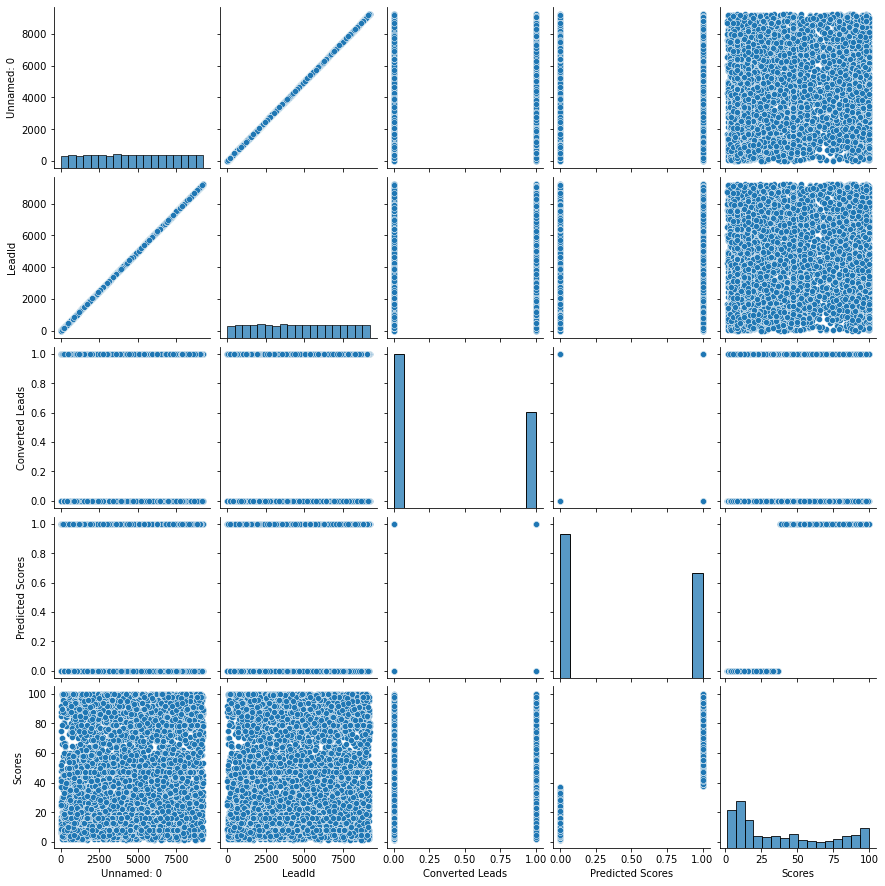

In [12]:
p = sns.pairplot(data)

In [13]:
x = data.drop(["Scores"],axis=1)
y = data.Scores

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)

In [17]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

R squared: 0.815415218852168


In [18]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.6170669558424049e-15


D:\ANA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ANA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


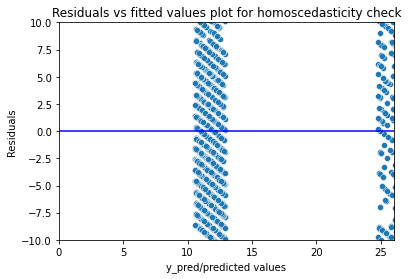

In [19]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [20]:
from scipy.stats import bartlett
test = bartlett(X_train[0],residuals)
print(test)

BartlettResult(statistic=10.340484123353255, pvalue=0.001301438734117295)


In [21]:
from scipy.stats import bartlett
test = bartlett(X_train[1],residuals)
print(test)

BartlettResult(statistic=26.80376581689786, pvalue=2.2519806773536572e-07)


In [22]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 0.9792507077252254), ('p-value', 0.6970516809792455)]

In [23]:
from scipy.stats import bartlett
test = bartlett(X_train[2],residuals)
print(test)

BartlettResult(statistic=13.116399428201408, pvalue=0.00029272206998934405)


D:\ANA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


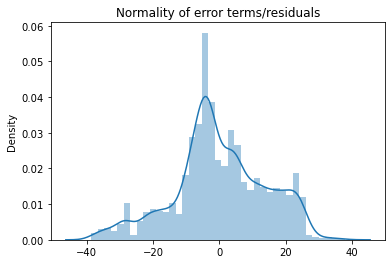

In [24]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

D:\ANA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ANA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


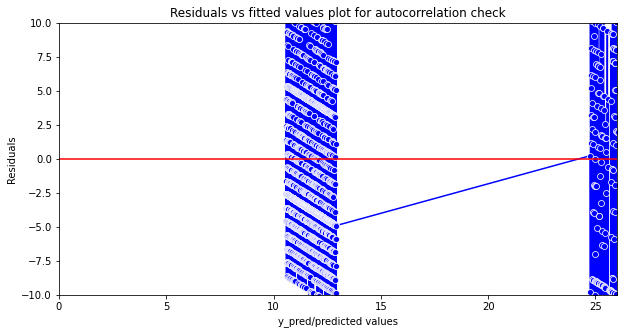

In [25]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [26]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

D:\ANA\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


0.3271378302137872

In [27]:
import statsmodels.api as sm

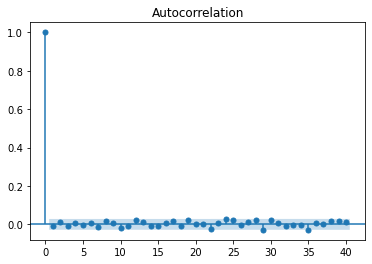

In [28]:
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

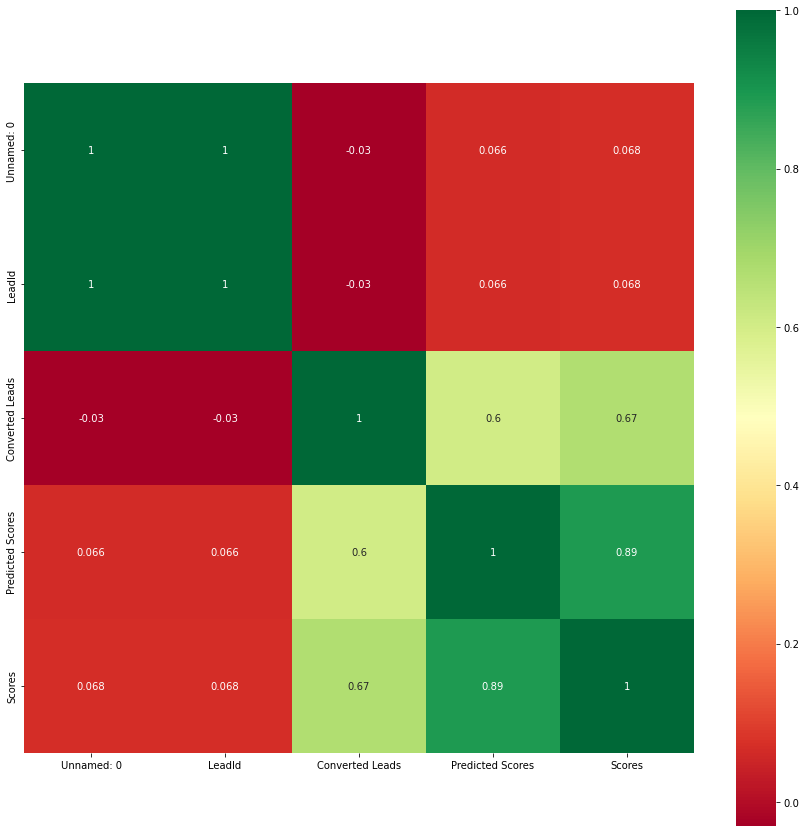

In [29]:
plt.figure(figsize=(15,15))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',square=True)

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train,y_train)
rf_tree_y_pred = rf_tree.predict(X_train)
print("Accuracy: {}".format(rf_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=rf_tree_y_pred)))

Accuracy: 0.9649173307980031
R squared: 0.9649173307980031


In [31]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=0)
dec_tree.fit(X_train,y_train)
dec_tree_y_pred = dec_tree.predict(X_train)
print("Accuracy: {}".format(dec_tree.score(X_train,y_train)))
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=dec_tree_y_pred)))

Accuracy: 1.0
R squared: 1.0
